In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('Twitch_global_data.csv')
data.rename(columns={
    'year':'ano',
    'Month':'mes',
    'Hours_watched':'horas_assistidas',
    'Avg_viewers':'media_visualizacoes',
    'Peak_viewers':'pico_de_visualizacoes',
    'Avg_channels':'media_canais',
    'Games_streamed':'jogos_transmitidos',
    'Viewer_ratio':'proporcao_de_espectadores',
}, inplace=True)
data

,ano,mes,horas_assistidas,media_visualizacoes,pico_de_visualizacoes,Streams,media_canais,jogos_transmitidos,proporcao_de_espectadores
0,2016,1,480241904,646355,1275257,7701675,20076,12149,29.08
1,2016,2,441859897,635769,1308032,7038520,20427,12134,28.98
2,2016,3,490669308,660389,1591551,7390957,20271,12234,28.92
3,2016,4,377975447,525696,1775120,6869719,16791,12282,28.80
4,2016,5,449836631,605432,1438962,7535519,19394,12424,28.85
...,...,...,...,...,...,...,...,...,...
80,2022,9,1817119612,2527287,4678056,22278079,90376,41863,28.37
81,2022,10,1883320673,2534751,4610799,22867973,90557,42164,28.35
82,2022,11,1694262814,2356415,5362892,21744817,88195,41058,26.84
83,2022,12,1674092138,2253152,3866814,21753674,84728,41548,27.00


In [90]:
#maior e menor crescimento de horas assistidas durante os meses

diferenca = data['horas_assistidas'].diff()
data['variacao_de_horas'] = diferenca

df = data.sort_values('variacao_de_horas',ascending=False)
# print(df)
df_select = df[['ano','mes','variacao_de_horas']]
print(df_select)
var_max = df.groupby(['ano','mes','variacao_de_horas'])['variacao_de_horas'].sum().idxmax()
var_min = df.groupby(['ano','mes','variacao_de_horas'])['variacao_de_horas'].sum().idxmin()
print(var_max)
print(var_min)


#isso daqui foram alguns testes não deve ser considerado
# horas_assis_ant = int(data.loc[(data['ano'] == 2020) & (data['mes'] == 3) , 'horas_assistidas'])
# horas_assis_ant2 = int(data.loc[(data['ano'] == 2021) & (data['mes'] == 5) , 'horas_assistidas'])
# porcentagem_de_crescimento = (var_max[2])/(horas_assis_ant)
# porcentagem_decrescimento = (var_min[2])/(horas_assis_ant2)
# print(f'{porcentagem_de_crescimento:.2%}')
# print(f'{porcentagem_decrescimento:.2%}')

# # print(df[df['horas_assistidas'] == df['horas_assistidas'].max()])
# # print(df[df['horas_assistidas'] == df['horas_assistidas'].min()])

     ano  mes  variacao_de_horas
51  2020    4        573939027.0
60  2021    1        296474851.0
72  2022    1        290046300.0
50  2020    3        236617937.0
62  2021    3        202072109.0
..   ...  ...                ...
82  2022   11       -189057859.0
61  2021    2       -194212207.0
70  2021   11       -208080469.0
65  2021    6       -344665031.0
0   2016    1                NaN

[85 rows x 3 columns]
(2020, 4, 573939027.0)
(2021, 6, -344665031.0)


In [94]:
#maior e menor crescimento percentual durante os meses
horas  = data[['ano','mes','horas_assistidas']]
horas['var_percentual'] = horas['horas_assistidas'].pct_change().fillna(0)
horas = horas.sort_values('var_percentual',ascending=False)
var_max_porcent = horas.groupby(['ano','mes','var_percentual'])['var_percentual'].sum().idxmax()
var_min_porcent = horas.groupby(['ano','mes','var_percentual'])['var_percentual'].sum().idxmin()
horas
print(var_max_porcent)
print(var_min_porcent)

print(f'''
em maio de {var_max_porcent[0]} temos o maior aumento percentual de horas assistidas
com um aumento de {var_max_porcent[2]:.2%}
''')
print(f'''
em junho de {var_min_porcent[0]} temos a maior redução  percentual de horas assistidas
com uma redução de {var_min_porcent[2]:.2%}
''')

(2020, 4, 0.47107117418179945)
(2016, 4, -0.2296737520823291)

em maio de 2020 temos o maior aumento percentual de horas assistidas
com um aumento de 47.11%


em junho de 2016 temos a maior redução  percentual de horas assistidas
com uma redução de -22.97%



C:\Users\Delson Cardoso\AppData\Local\Temp\ipykernel_16924\2134922741.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  horas['var_percentual'] = horas['horas_assistidas'].pct_change().fillna(0)


,Streams
mes,
1,17165910.0
2,14728239.0
3,16092204.0
4,15306593.0
5,15810690.0
6,14912642.0
7,15768544.0
8,15693955.0
9,14573287.0


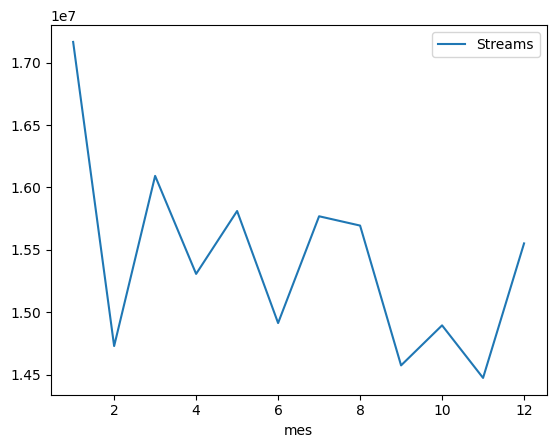

In [52]:



media_transmicoes =data.pivot_table(values='Streams', index ='mes',aggfunc='mean',).round(0)
# media_transmicoes['Streams']= media_transmicoes['Streams'].round(0)
media_transmicoes.plot()
media_transmicoes


,Streams
mes,
1,1614852.0
2,-2437671.0
3,1363965.0
4,-785611.0
5,504097.0
6,-898048.0
7,855902.0
8,-74589.0
9,-1120668.0


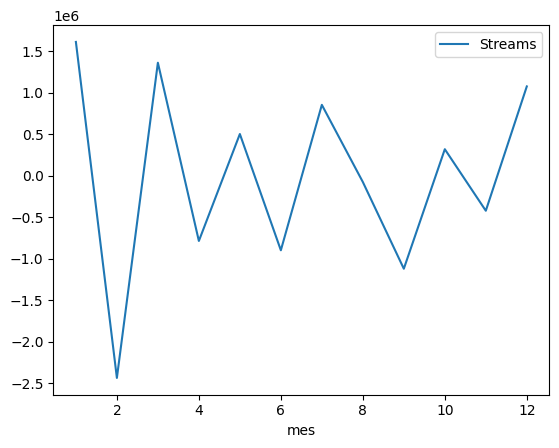

In [53]:
diff = media_transmicoes.loc[1, 'Streams'] - media_transmicoes.loc[12, 'Streams']
diferenca_de_medias = media_transmicoes.diff().fillna(diff)
diferenca_de_medias.plot()
diferenca_de_medias

#ou seja, de dez para janeiro a média de visualizações aumenta em 1614852 vizualizações


In [48]:
media_transmicoes.sort_values(by= 'Streams',ascending=False)
#Ranking dos meses com maior média de transmissões

,Streams
mes,
1,17165910.0
3,16092204.0
5,15810690.0
7,15768544.0
8,15693955.0
12,15551058.0
4,15306593.0
6,14912642.0
10,14894164.0
